<h1 align="center">Report - Magnetotelluric aquisition and data processing<h1> 

<h2 align='center'>Magnetotelluric Acquisition </h2>

<h4 align='justify'>The magnetotelluric is a exploration passive method that uses a spectral band of geomagnetic variation. The magnetotelluric technical consists of the measure, in the Earth's surface, of fluctuations in the electric (E) and magnetic field to recover the the conductive structure of the Earth. The basis of this method reside in the fact of the penetration depth of the electromagnetic fields in the Earth depends of the field's period and the earth's material conductance. The periods are in the range of $10^{-3}$ to $10^{5}$ seconds, and the penetration depth increase with period. The depth penetration is related with the total time used during acquisition and the conductance of the Earth's material. </h4>

<h4 align='justify'>The location of our station is in the Aderson's Racho, figure below. This is a farm near the Pium de Cima, a suburb of Natal.</h4> 
<img src='racho.jpeg'>


<h4 align='justify'> In our campaign the acquisition duration was 24 hours. The sensors was installed according of the scheme bellow:</h4>

<img src='Deploy.jpeg'>

<h4 align='center'>The equipaments used in this acquisition are: </h4>
<h4 align='center'>. 1 Fluxgate magnetometer, </h4>
<h4 align='center'>. 4 electrodes,</h4>
<h4 align='center'>. 1 GPS antenna, </h4>
<h4 align='center'>. 1 recorder - LEMI , </h4>
<h4 align='center'>. 1 receiver, </h4>
<h4 align='center'>. 1 battery. </h4>

<h4 align='justify'>The magnetic data has collected using a Fluxgate magnetometer to measure the fluctuation of the magnetic field in three directions x,y,z (Hx,Hy,Hz). This type of equipament can recovery large periods, when it is comparing with bobine coils. One advantage of the Fluxgate is the facility of instalation, because when you use this one you need to burry just the sensor, but, in the case of the bobine coils, you need to burry three coils. The electrical flutuations are determined measuring the potential difference between the pair of electrodes. This ones are connected by a cable to create dipolos. It is very important that x and y directions of the electrodos are orthogonal. In our campaign, we use five electrodos, one electrodo in the end of the cable and one in center, how is showed in the figure above. Thus, we create 4 dipolos, instead of 2 how normally is maded. Two dipolos was created in NS direction (N0 and S0) and two in WE (W0 and E0). This type of configuration guarantee a signal redundance, because if we have some problem with one dipolo, we can use the data recorded in the other dipolo. So, we align N0 and S0 dipolo with the North Magnetic. After this, we tested the electrodos' resistivities with a voltimeter. In the end, we connected the dipolos and the magnetometer in the digital acquisition unit. This one is formed by the receiver and  the recorder. We connected each dipolo in the receiver, and later we plugged the GPS antenna and the battery in the recorder. </h4>



<h4 align='justify'> After this, we tested the configuration, the GPS signal and the battery voltage. Later, we took down some informations, how showed in the figure bellow:</h4>

<img src='notes.jpeg'>


<h4 align='justify'>After the data acquisition, we visualized the data analize and indentify our the data set. In this step, we plotted the time series of each channel looking for some problems in the acquisition. This problems can be gaps, high signal-noise ratio and no data recorded. The following step was plotted the spectrogram.</h4>

<h2 align="center">Importing modulus to calculate and plotting data<h2> 

In [1]:
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.gridspec as gridspec
%matplotlib inline

<h2 align="center">  Importing MT data</h2> 

In [2]:
header = np.genfromtxt('/home/diogo/Documents/MT_disc/ADE01/ADE01.asc', delimiter=',', dtype='str')[0]
ADE = np.genfromtxt('/home/diogo/Documents/MT_disc/ADE01/ADE01.asc', delimiter=',',skip_header=1)

<h2 align="center">  Plotting time series</h2>  



In [3]:
Bx = ADE[:,0]
By = ADE[:,1]
Bz = ADE[:,2]
En = ADE[:,3]
Ee = ADE[:,4]
Es = ADE[:,5]
Ew = ADE[:,6]

data = [Bx,By,Bz,En,Ee,Es,Ew]

<h3 align='center'>Matlibplot.Gridspec to plot each time serie in a subplot (more in http://matplotlib.org/examples/pylab_examples/demo_tight_layout.html)</h3>

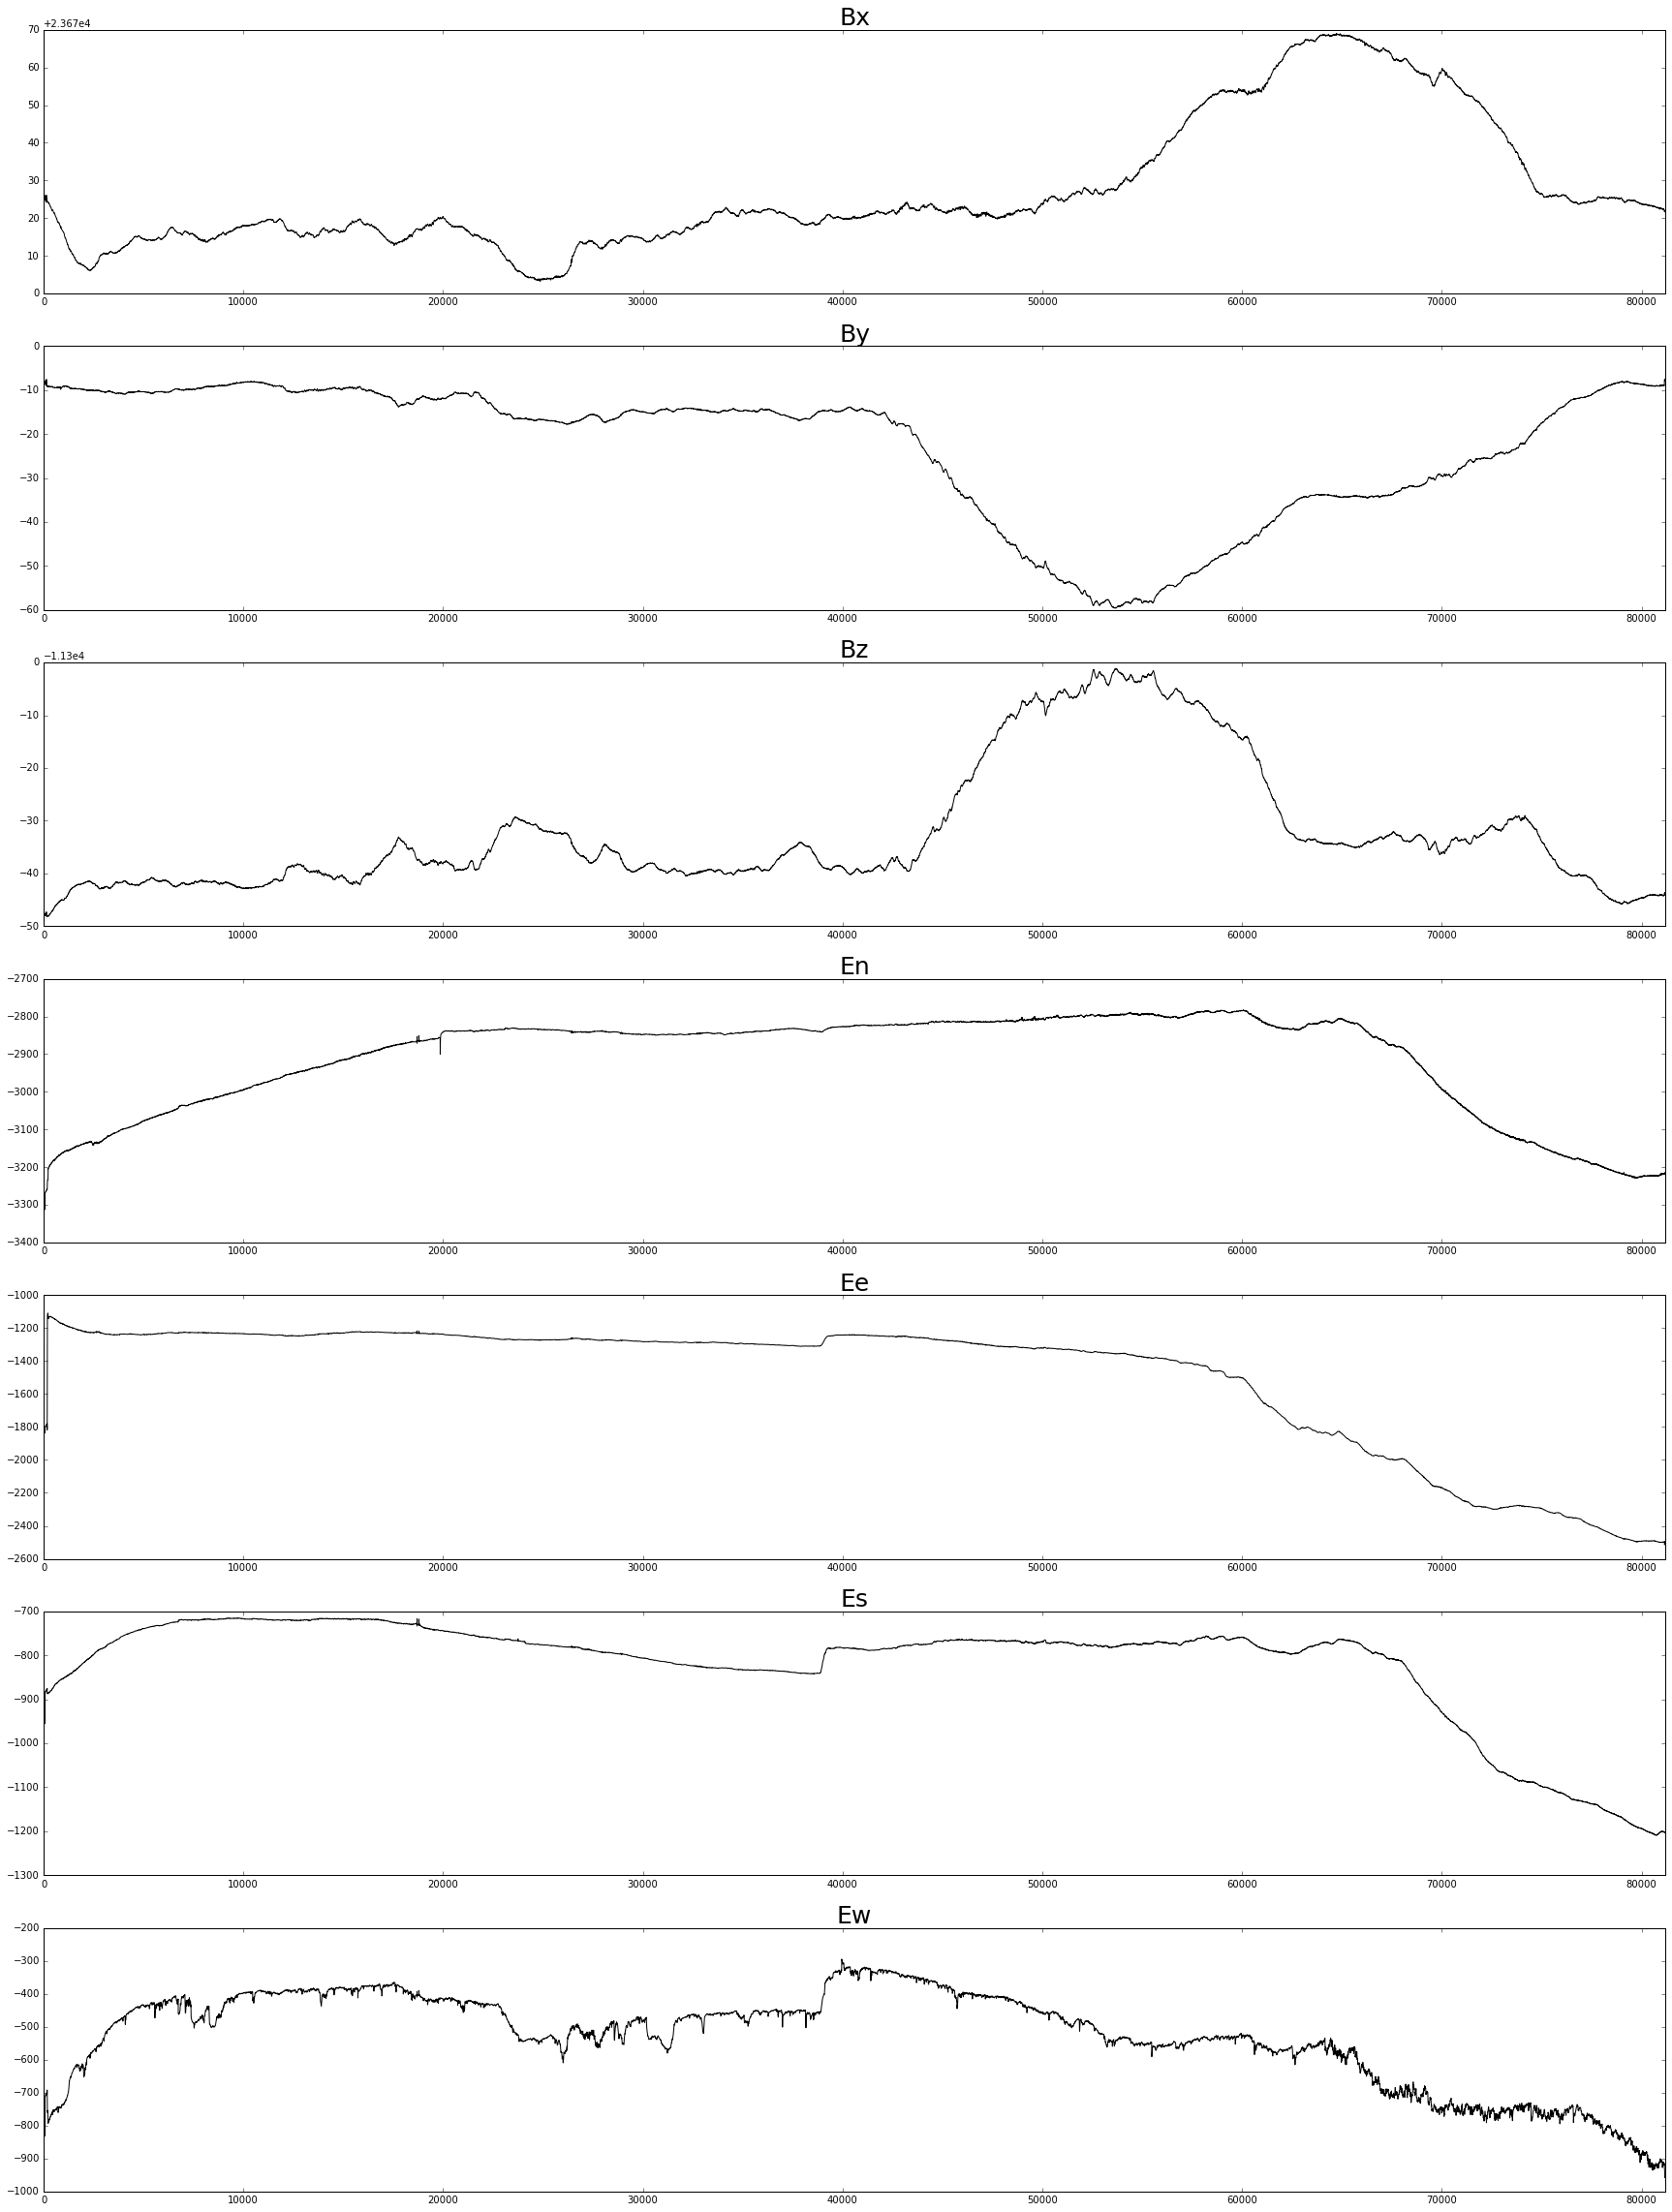

In [4]:
fig = mpl.figure(figsize=(30,40))
gs1 = gridspec.GridSpec(len(data),1)

for i,j in enumerate(data):
    ax = fig.add_subplot(gs1[i])
    ax.set_title(header[i],fontsize=25)
    ax.plot(np.arange(len(data[0])),j,'k')
    ax.set_xlim(min(np.arange(len(data[0]))),max(np.arange(len(data[0]))))

<h2 align='center'> Calculating the spectre to Bx,By,Bz,En,Ee,Es,Ew component  (Discrete Fourier Transform http://docs.scipy.org/doc/numpy/reference/routines.fft.html)</h2>

<h5> Setting the HANNING window, which one maximizes the energy in the main lobe of the window relative to total energy. </h5>

In [5]:
N = len(ADE)
window = np.kaiser(N,6)
window = window/sum(np.convolve(window,window))

<h5> The spectrogram x-axis</h5>

In [6]:
SR = 1 
fr = (1/(SR*N))*(np.arange(N)/2)

<h5> Normalization of the component</h5>

In [7]:
component_data = []
for i,j in enumerate(data):
    component_data.append(j - np.mean(j))

<h5> Linear convolution between the component and the HANNING window</h5>

In [8]:
component_w = [np.convolve(i, window) for i in component_data]

<h5> One-dimensional discrete Fourier Transform of the previous convolution . </h5>

In [9]:
component_wf = [np.fft.fft(i) for i in component_w]

<h5> Linear convolution between the discrete Fourier Transform and his conjugate</h5>

In [10]:
perd = [np.convolve(i,np.conjugate(i)) for i in component_wf]

<h5> Smoothness window size </h5>

In [23]:
nsm = 13
smooth = np.ones(nsm)/nsm

<h5> Shift the convolution between the component and the smothness window to the center of the spectrum. </h5>

In [24]:
spectrum = [np.fft.fftshift(np.convolve(np.fft.fftshift(i),smooth)) for i in perd]

<h2 align='center'>Plotting the Spectrogram</h2>

/home/diogo/programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide
/home/diogo/programs/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


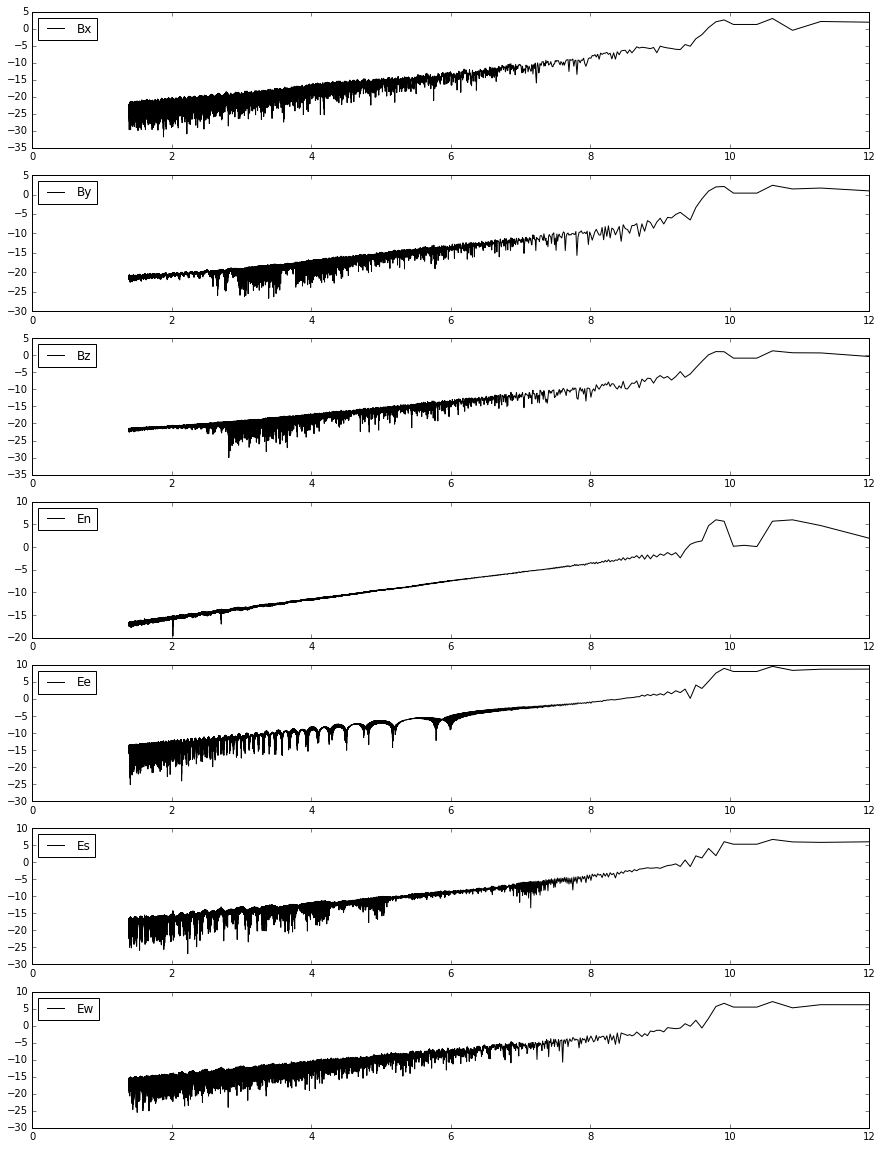

In [25]:
fig = mpl.figure(figsize=(15,20))
gs1 = gridspec.GridSpec(len(spectrum),1)

for i,j in enumerate(spectrum):
    ax = fig.add_subplot(gs1[i])
    ax.plot(np.log(1/fr[:int(N/2)]),np.log(j[:int(N/2)]),'k',label=header[i])
    ax.legend(loc=2)

<h4 align='justify'>A rely data interpretation in the MT method depends directly of the quality of the elements of the impendance tensor. Thus, it is related with a good instalation site where the MT sounding will be installed, a good data acquisition and a processing that can remove the noise in the data set. After that, we can retreive a consistent smooth functions set that represent the subsurface response. <h/4>